# Downloading and Analyzing the Dataset with Visualizations

## Imports

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from importlib.metadata import version
import logging, os
from pathlib import Path

In [3]:
# Set up logging
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

In [4]:
packages = ["pandas", "seaborn", "matplotlib", "importlib-metadata"]
for package in packages:
    try:
        logger.info(f"{package} version: {version(package)}")
    except Exception as e:
        logger.warning(f"Could not get version for package {package}: {e}")

INFO:__main__:pandas version: 2.3.1
INFO:__main__:seaborn version: 0.13.2
INFO:__main__:matplotlib version: 3.10.5
INFO:__main__:importlib-metadata version: 8.7.0


## Download the data from huggingface to a dataframe
 - Download data
 - Save the data to local directory to store the raw data file

In [5]:
DATA_ROOT = Path("../Data")
RAW_DATA_DIR_NAME = "Data"

DATA_RAW_FILE_NAME = "credit-card-fraud-RAW.csv"
DATA_CLEAN_FILE_NAME = "credit-card-fraud-CLEAN.csv"

TEMP_DATA_PATH = DATA_ROOT / RAW_DATA_DIR_NAME / DATA_RAW_FILE_NAME
DATA_PATH = DATA_ROOT / RAW_DATA_DIR_NAME / DATA_CLEAN_FILE_NAME

In [ ]:
# DATASET_URL = "hf://datasets/dazzle-nu/CIS435-CreditCardFraudDetection/fraudTrain.csv"
# # takes a while due to the size (~50sec)
# df = pd.read_csv(DATASET_URL)

In [6]:
df = pd.read_csv(TEMP_DATA_PATH)

In [7]:
os.makedirs(DATA_ROOT / RAW_DATA_DIR_NAME, exist_ok=True)  # Create directory if it doesn't exist

In [ ]:
# df.to_csv(TEMP_DATA_PATH, index=False)   # Save the data to local directory to store the raw data file

## Data Exploration

In [9]:
df.head()

Unnamed: 0 trans_date_trans_time        cc_num  \
0           0           1/1/19 0:00  2.703190e+15   
1           1           1/1/19 0:00  6.304230e+11   
2           2           1/1/19 0:00  3.885950e+13   
3           3           1/1/19 0:01  3.534090e+15   
4           4           1/1/19 0:03  3.755340e+14   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ... city_pop  \
0    Banks      F                561 Perry Cove  ...     3495   
1     Gill      F  43039 Riley Greens Suite 393  ...      149   
2  Sanchez      M      594 White Dale Suite 530  ...     4154   
3    White      M   9443 Cynthia Court Apt. 038  ...     1939   
4   Garcia      M              408 Bradley Rest  ...       99   

                                 job      dob  \
0          Psychologist, counselling   3/9/88   
1  Special educational needs teacher  6/21/78   
2        Nature conservation officer  1/19/62   
3                    Patent attorney  1/12/67   
4     Dance movement psychotherapist  3/28/86   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud Unnamed: 23  6006  
0        0         NaN   NaN  
1        0         NaN   NaN  
2        0         NaN   NaN  
3        0         NaN   NaN  
4        0         NaN   NaN  

[5 rows x 25 columns]

In [6]:
df.tail()

Unnamed: 0 trans_date_trans_time        cc_num  \
1048570     1048570         3/10/20 16:07  6.011980e+15   
1048571     1048571         3/10/20 16:07  4.839040e+15   
1048572     1048572         3/10/20 16:08  5.718440e+11   
1048573     1048573         3/10/20 16:08  4.646850e+18   
1048574     1048574         3/10/20 16:08  2.283740e+15   

                                   merchant        category     amt     first  \
1048570                     fraud_Fadel Inc  health_fitness   77.00     Haley   
1048571    fraud_Cremin, Hamill and Reichel        misc_pos  116.94  Meredith   
1048572  fraud_O'Connell, Botsford and Hand            home   21.27     Susan   
1048573              fraud_Thompson-Gleason  health_fitness    9.52     Julia   
1048574                 fraud_Buckridge PLC        misc_pos    6.81   Shannon   

             last gender                            street  ... city_pop  \
1048570    Wagner      F            05561 Farrell Crescent  ...    92106   
1048571  Campbell      F               043 Hanson Turnpike  ...     1583   
1048572     Mills      F                  005 Cody Estates  ...   736284   
1048573      Bell      F               576 House Crossroad  ...     4056   
1048574  Williams      F  9345 Spencer Junctions Suite 183  ...   165556   

                                     job       dob  \
1048570  Accountant, chartered certified   5/28/43   
1048571                       Geochemist   6/28/99   
1048572            Engineering geologist    4/2/52   
1048573                Film/video editor   6/25/90   
1048574                   Prison officer  12/27/97   

                                trans_num   unix_time  merch_lat merch_long  \
1048570  45ecd198c65e81e597db22e8d2ef7361  1362931649  38.779464 -76.317042   
1048571  c00ce51c6ebb7657474a77b9e0b51f34  1362931670  41.400318 -92.726724   
1048572  17c9dc8b2a6449ca2473726346e58e6c  1362931711  37.293339 -84.798122   
1048573  5ca650881b48a6a38754f841c23b77ab  1362931718  39.773077 -72.213209   
1048574  8d0a575fe635bbde12f1a2bffc126731  1362931730  33.601468 -83.891921   

        is_fraud Unnamed: 23  6006  
1048570        0         NaN   NaN  
1048571        0         NaN   NaN  
1048572        0         NaN   NaN  
1048573        0         NaN   NaN  
1048574        0         NaN   NaN  

[5 rows x 25 columns]

In [6]:
df.size  # amount of data points

26214375

In [7]:
df.shape

(1048575, 25)

In [13]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'Unnamed: 23', '6006'],
      dtype='object')

In [12]:
df.isnull().sum()

Unnamed: 0                     0
trans_date_trans_time          0
cc_num                         0
merchant                       0
category                       0
amt                            0
first                          0
last                           0
gender                         0
street                         0
city                           0
state                          0
zip                            0
lat                            0
long                           0
city_pop                       0
job                            0
dob                            0
trans_num                      0
unix_time                      0
merch_lat                      0
merch_long                     0
is_fraud                       0
Unnamed: 23              1048575
6006                     1048575
dtype: int64

In [14]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
Unnamed: 23              float64
6006                     float64
dtype: object

## Interpreting the Columns:

 - Unnamed: 0 - Some Index                      (int64)
 - trans_date_trans_time -                      (object)
 - cc_num - credit card number                  (float64)
 - merchant                                     (object)
 - category                                     (object)
 - amt - transaction amount                     (float64)
 - first - First Name                           (object)
 - last - Last Name                             (object)
 - gender                                       (object)
 - street                                       (object)
 - city - City of card owner                    (object)
 - state - of card owner                        (object)
 - zip - of card owner                          (int64)
 - lat - of card owner                          (float64)
 - long  - of card owner                        (float64)
 - city_pop                                     (int64)
 - job                                          (object)
 - dob - Date of Birth                          (object)
 - trans_num                                    (object)
 - unix_time                                    (int64)
 - merch_lat                                    (float64)
 - merch_long                                   (float64)
 - is_fraud                                     (int64)
 - Unnamed: 23 - mystery                        (float64)
 - 6006 - mystery                               (float64)

## Visualizing Data

### Countplots

In [ ]:
plt.figure(figsize=(24, 12))
# sns.countplot(x='age', data=df) # alternative way
sns.countplot(x=df["category"])  # more direct
plt.title("Categories Count Plot")
plt.xticks(rotation=45)
plt.show()

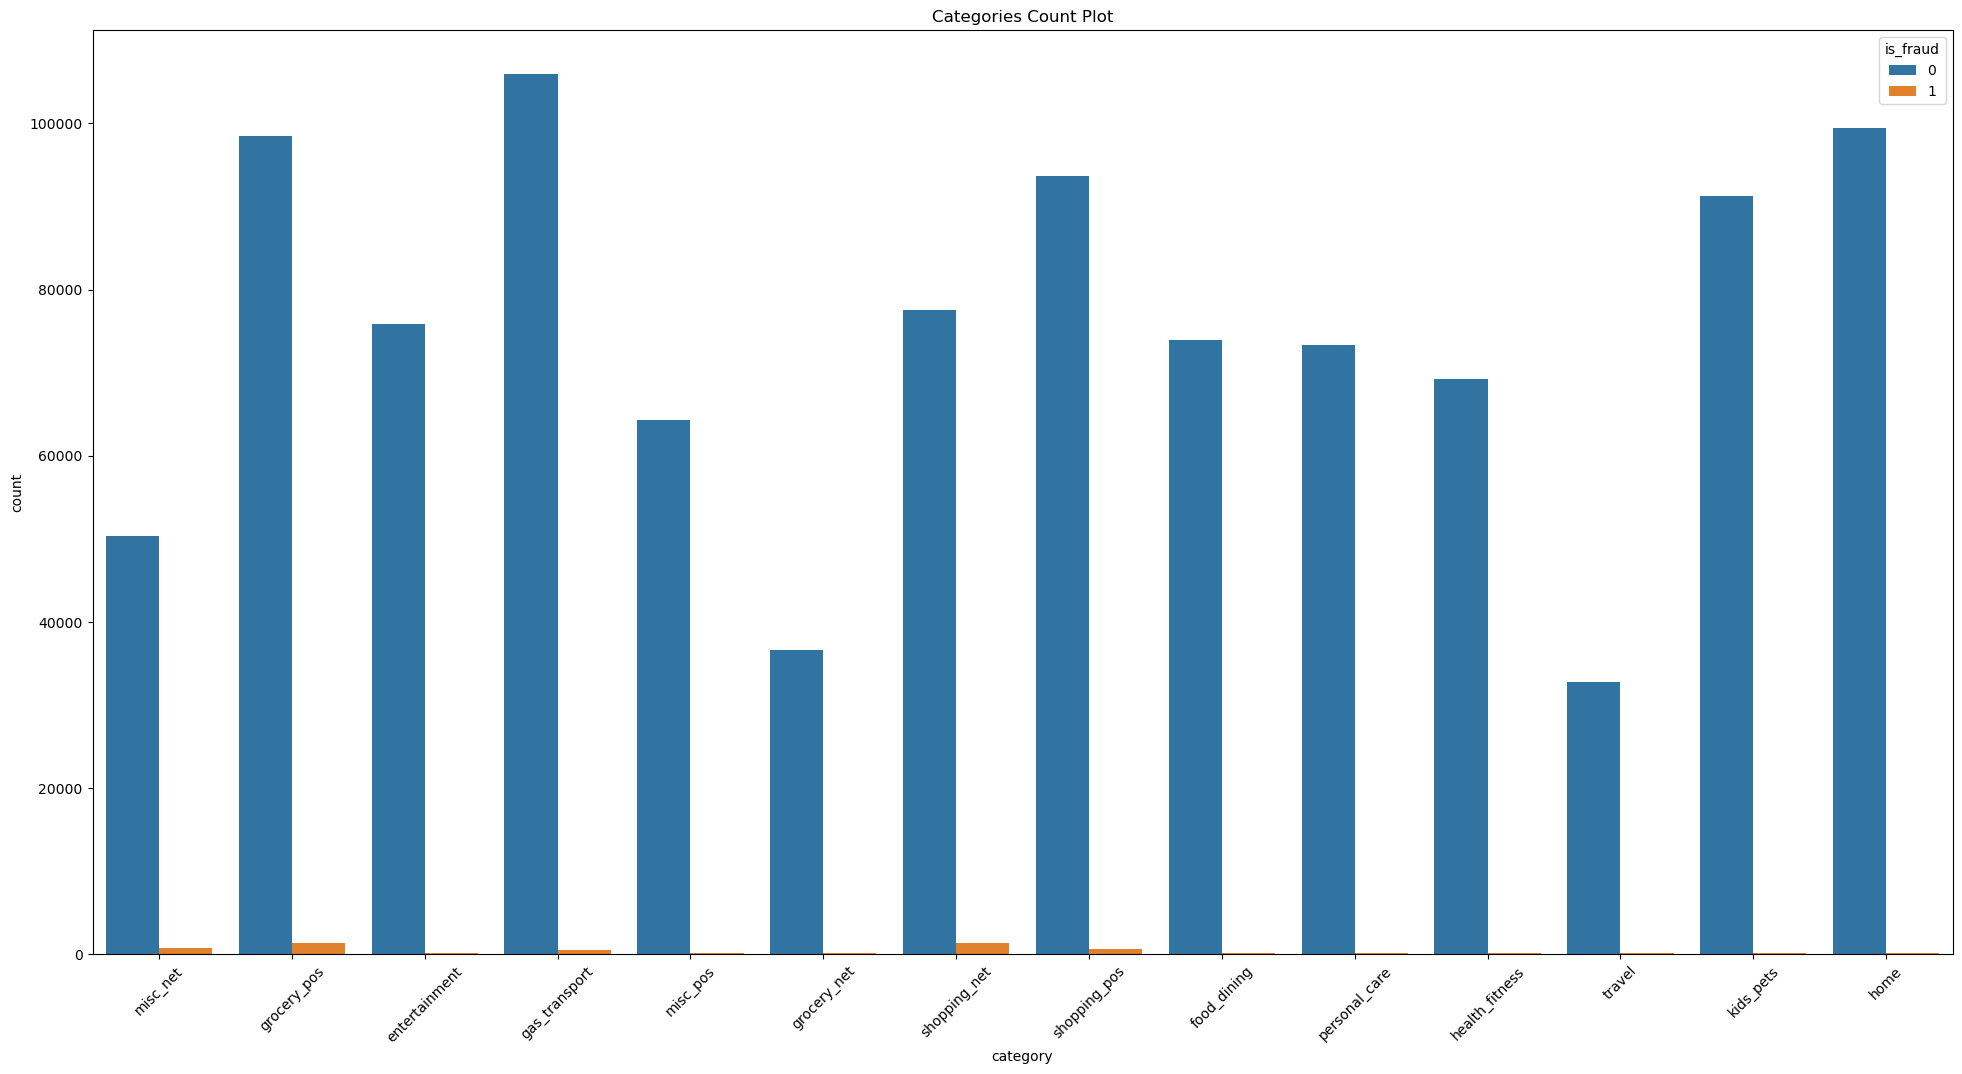

In [ ]:
plt.figure(figsize=(24, 12))
# sns.countplot(x='age', data=df) # alternative way
sns.countplot(x=df["category"], hue=df["is_fraud"])  # more direct
plt.title('Categories Count Plot with "is_fraud" hue')
plt.xticks(rotation=45)
plt.show()

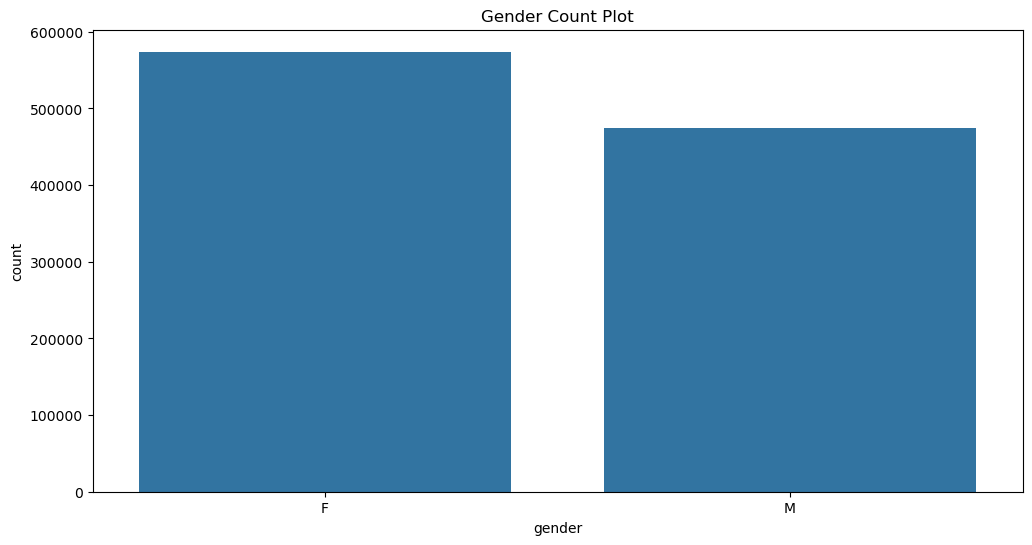

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df["gender"])
plt.title("Gender Count Plot")
plt.show()

In [34]:
# Sort the unique state values alphabetically
sorted_states = sorted(df["state"].unique())

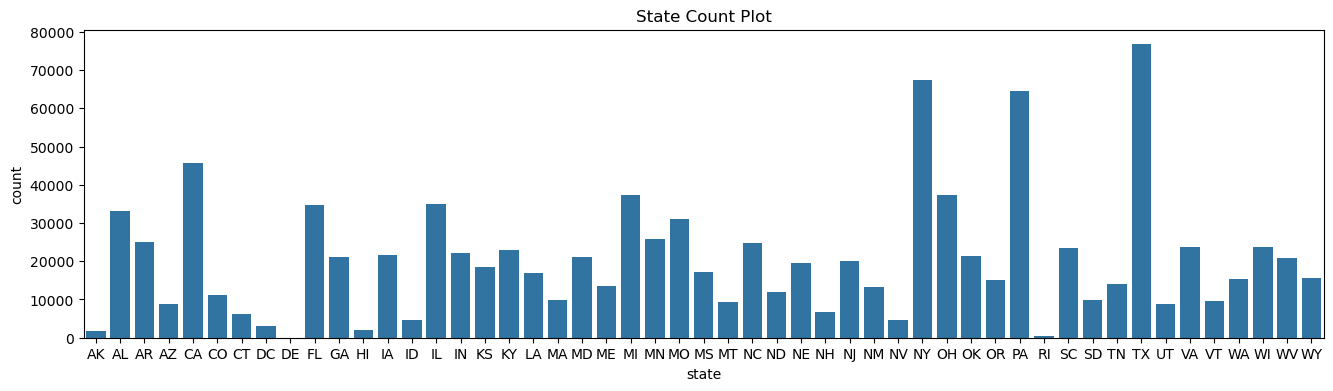

In [28]:
plt.figure(figsize=(16, 4))
sns.countplot(data=df, x="state", order=sorted_states)
plt.title("State Count Plot")
plt.show()

In [8]:
merchants = df["merchant"].unique

In [10]:
print(merchants)

<bound method Series.unique of 0                  fraud_Rippin, Kub and Mann
1             fraud_Heller, Gutmann and Zieme
2                        fraud_Lind-Buckridge
3          fraud_Kutch, Hermiston and Farrell
4                         fraud_Keeling-Crist
                          ...                
1048570                       fraud_Fadel Inc
1048571      fraud_Cremin, Hamill and Reichel
1048572    fraud_O'Connell, Botsford and Hand
1048573                fraud_Thompson-Gleason
1048574                   fraud_Buckridge PLC
Name: merchant, Length: 1048575, dtype: object>


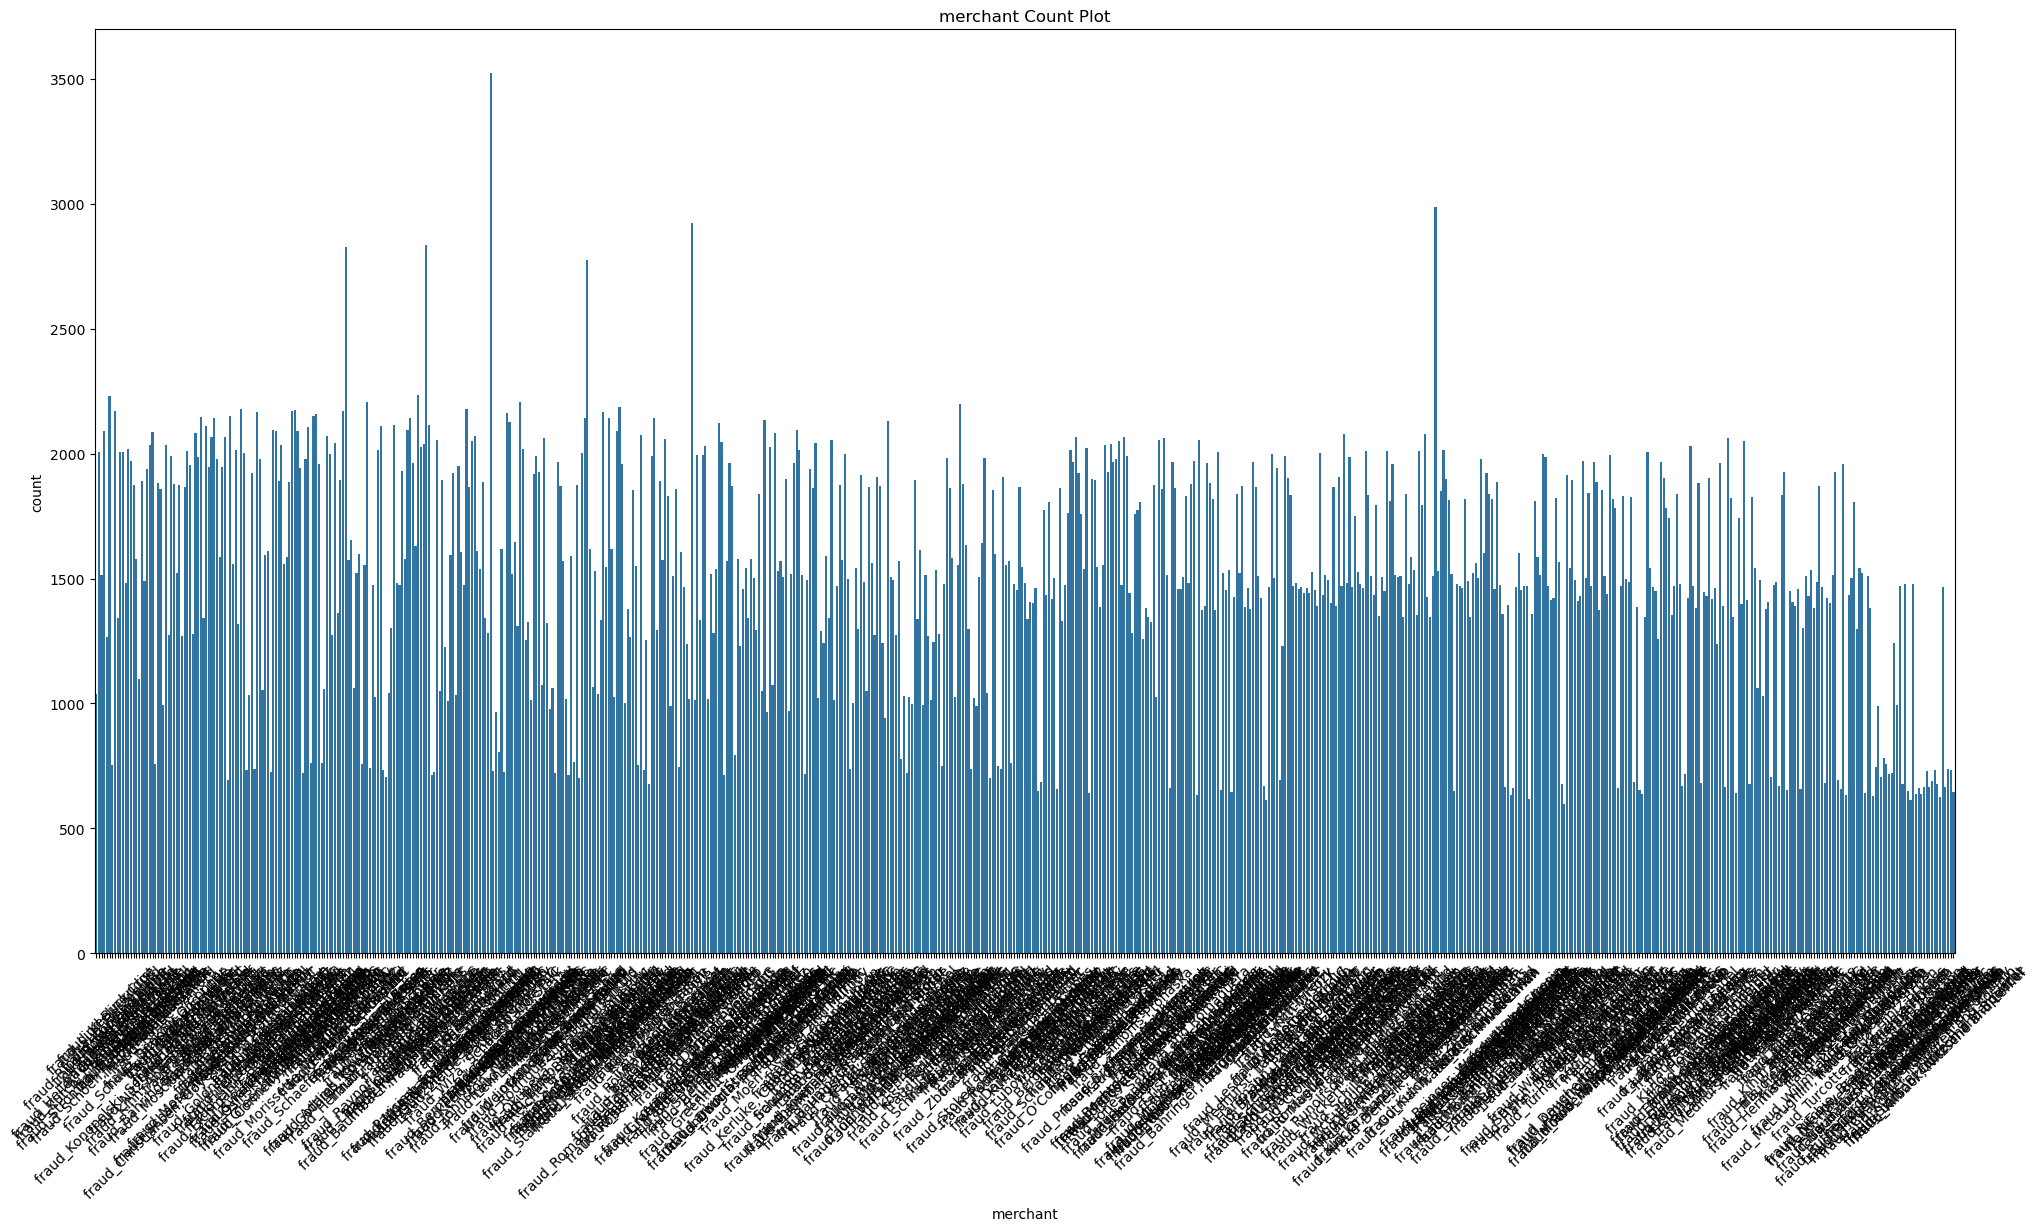

In [8]:
plt.figure(figsize=(24, 12))
# sns.countplot(x='age', data=df) # alternative way
sns.countplot(x=df["merchant"])  # more direct
plt.title("merchant Count Plot")
plt.xticks(rotation=45)
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


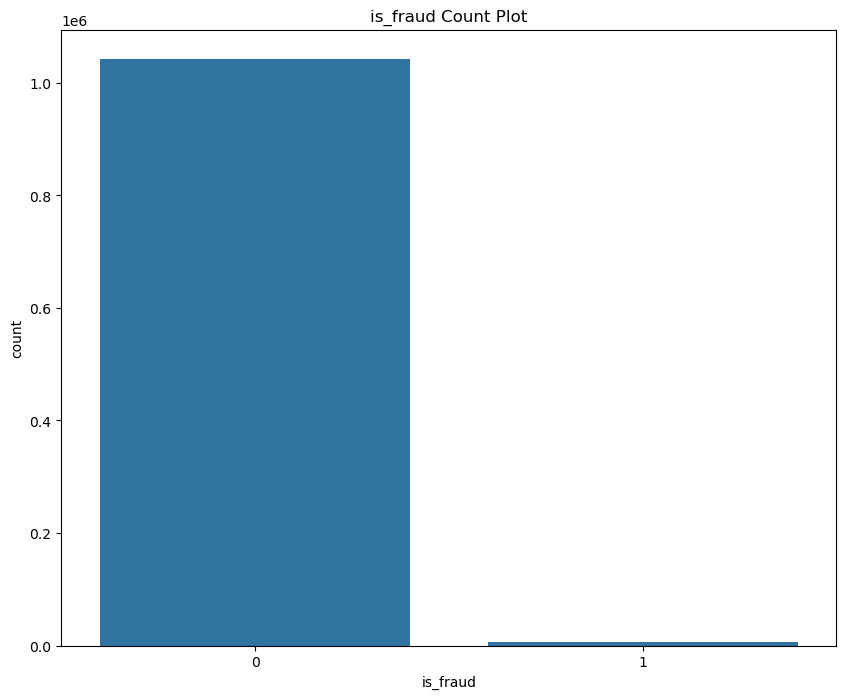

In [29]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x="is_fraud")
plt.title(label="is_fraud Count Plot")
plt.show()

In [9]:
fraud_df = df[df["is_fraud"] == 1]

In [10]:
fraud_df.shape

(6006, 25)

In [11]:
num_valid_transactions = df[df["is_fraud"] == 0]
print(num_valid_transactions.shape)

(1042569, 25)


# Notes 
Very unbalanced dataset 
1048575 total data points
with 6006 fraudulents (.57%) and 
1042569 non-fraudulent data points (99.43%).



In [28]:
fraud_df

Unnamed: 0 trans_date_trans_time        cc_num  \
2449           2449           1/2/19 1:06  4.613310e+12   
2472           2472           1/2/19 1:47  3.401870e+14   
2523           2523           1/2/19 3:05  3.401870e+14   
2546           2546           1/2/19 3:38  4.613310e+12   
2553           2553           1/2/19 3:55  3.401870e+14   
...             ...                   ...           ...   
1047089     1047089          3/10/20 3:59  3.589290e+15   
1047157     1047157          3/10/20 4:31  3.546670e+15   
1047208     1047208          3/10/20 4:59  3.589290e+15   
1047521     1047521          3/10/20 8:22  3.589290e+15   
1047918     1047918         3/10/20 12:09  3.589290e+15   

                                 merchant       category     amt   first  \
2449               fraud_Rutherford-Mertz    grocery_pos  281.06   Jason   
2472     fraud_Jenkins, Hauck and Friesen  gas_transport   11.52   Misty   
2523               fraud_Goodwin-Nitzsche    grocery_pos  276.31   Misty   
2546               fraud_Erdman-Kertzmann  gas_transport    7.03   Jason   
2553                   fraud_Koepp-Parker    grocery_pos  275.73   Misty   
...                                   ...            ...     ...     ...   
1047089                fraud_Kris-Weimann       misc_net  690.49   Paula   
1047157     fraud_Casper, Hand and Zulauf    grocery_pos  324.74  Jordan   
1047208                   fraud_Kiehn Inc    grocery_pos  331.33   Paula   
1047521                fraud_Rau and Sons    grocery_pos  356.20   Paula   
1047918           fraud_O'Connell-Ullrich           home  249.56   Paula   

            last gender                     street  ... city_pop  \
2449      Murphy      M  542 Steve Curve Suite 011  ...      885   
2472        Hart      F  27954 Hall Mill Suite 575  ...  1595797   
2523        Hart      F  27954 Hall Mill Suite 575  ...  1595797   
2546      Murphy      M  542 Steve Curve Suite 011  ...      885   
2553        Hart      F  27954 Hall Mill Suite 575  ...  1595797   
...          ...    ...                        ...  ...      ...   
1047089  Estrada      F            350 Stacy Glens  ...      343   
1047157      May      M          1626 Susan Course  ...    13602   
1047208  Estrada      F            350 Stacy Glens  ...      343   
1047521  Estrada      F            350 Stacy Glens  ...      343   
1047918  Estrada      F            350 Stacy Glens  ...      343   

                                           job       dob  \
2449                            Soil scientist   9/15/88   
2472                  Horticultural consultant  10/28/60   
2523                  Horticultural consultant  10/28/60   
2546                            Soil scientist   9/15/88   
2553                  Horticultural consultant  10/28/60   
...                                        ...       ...   
1047089  Development worker, international aid    3/5/72   
1047157                            Optometrist    7/5/84   
1047208  Development worker, international aid    3/5/72   
1047521  Development worker, international aid    3/5/72   
1047918  Development worker, international aid    3/5/72   

                                trans_num   unix_time  merch_lat merch_long  \
2449     e8a81877ae9a0a7f883e15cb39dc4022  1325466397  36.430124 -81.179483   
2472     bc7d41c41103877b03232f03f1f8d3f5  1325468849  29.819364 -99.142791   
2523     b98f12f4168391b2203238813df5aa8c  1325473523  29.273085 -98.836360   
2546     397894a5c4c02e3c61c784001f0f14e4  1325475483  35.909292 -82.091010   
2553     7863235a750d73a244c07f1fb7f0185a  1325476547  29.786426 -98.683410   
...                                   ...         ...        ...        ...   
1047089  fb1ddd251bbec9b84c9755e856d51723  1362887989  43.254214 -98.267759   
1047157  4dca0549e43b7e265cae7fd8a7e563b4  1362889904  33.607221 -97.996506   
1047208  d18c55035998e461aa9040e254b74925  1362891561  44.228731 -98.330520   
1047521  bdaeb5e3413a408d7e6c3720a35337d5  1362903771  43.9

### ScatterPlots

<Axes: xlabel='is_fraud', ylabel='category'>

c:\Users\brianperez\AppData\Local\anaconda3\envs\WP_env\lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\brianperez\AppData\Local\anaconda3\envs\WP_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


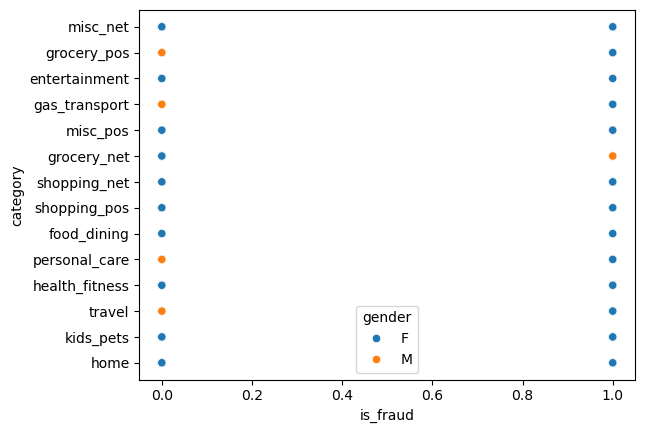

In [37]:
sns.scatterplot(data=df, x="is_fraud", y="category", hue="gender")

In [ ]:
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker")

In [ ]:
sns.scatterplot(data=df, x="age", y="bmi", hue="sex")

In [ ]:
sns.scatterplot(data=df, x="age", y="children", hue="smoker")

### Distribution Plots

In [ ]:
sns.displot(df["bmi"], kde=True)

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="age", bins=30, kde=True)
plt.title("Age Distribution Plot")
plt.show()

### Jointplots

<Figure size 2000x1200 with 0 Axes>

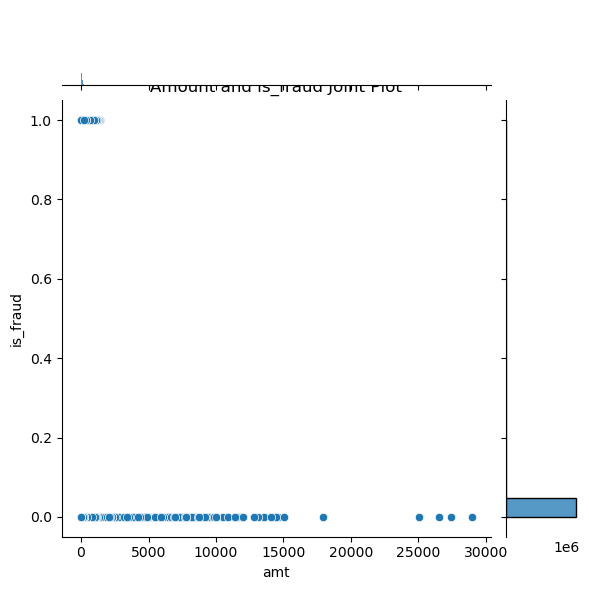

In [13]:
plt.figure(figsize=(20, 12))
sns.jointplot(data=df, x="amt", y="is_fraud")
plt.title("Amount and is_fraud Joint Plot")
plt.show()

<Figure size 2000x1200 with 0 Axes>

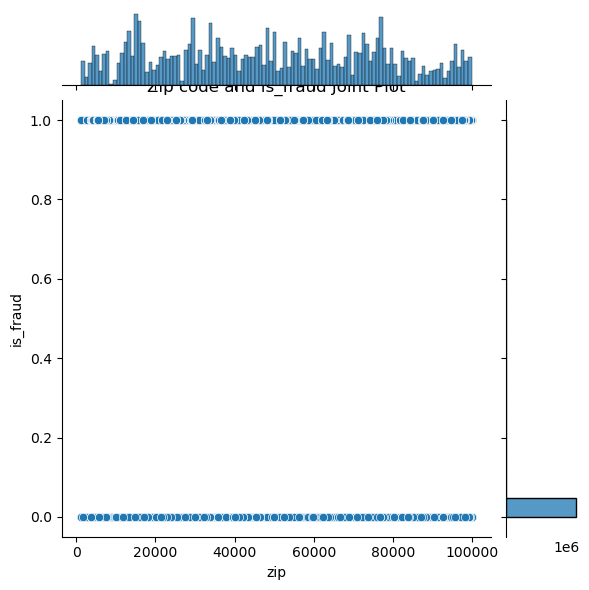

In [14]:
plt.figure(figsize=(20, 12))
sns.jointplot(data=df, x="zip", y="is_fraud")
plt.title("Zip code and is_fraud Joint Plot")
plt.show()

<Figure size 2000x600 with 0 Axes>

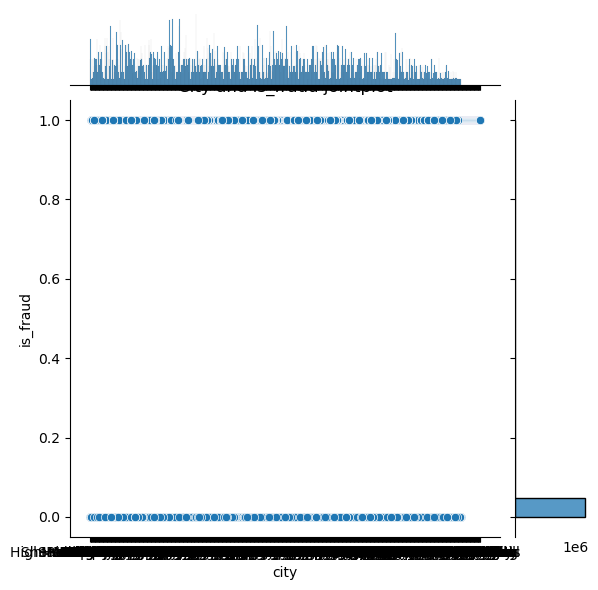

In [42]:
plt.figure(figsize=(20, 6))
sns.jointplot(data=df, x="city", y="is_fraud")
plt.title("City and is_fraud jointplot")
plt.show()

Describe

In [15]:
df.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   5.242870e+05  4.171565e+17  7.027910e+01  4.880159e+04  3.853336e+01   
std    3.026977e+05  1.308811e+18  1.599518e+02  2.689804e+04  5.076852e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.621435e+05  1.800400e+14  9.640000e+00  2.623700e+04  3.462050e+01   
50%    5.242870e+05  3.520550e+15  4.745000e+01  4.817400e+04  3.935430e+01   
75%    7.864305e+05  4.642260e+15  8.305000e+01  7.204200e+04  4.194040e+01   
max    1.048574e+06  4.992350e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean  -9.022626e+01  8.905776e+04  1.344906e+09  3.853346e+01 -9.022648e+01   
std    1.375858e+01  3.024351e+05  1.019700e+07  5.111233e+00  1.377093e+01   
min   -1.656723e+02  2.300000e+01  1.325376e+09  1.902779e+01 -1.666712e+02   
25%   -9.679800e+01  7.430000e+02  1.336682e+09  3.472954e+01 -9.689864e+01   
50%   -8.747690e+01  2.456000e+03  1.344902e+09  3.936295e+01 -8.743923e+01   
75%   -8.015800e+01  2.032800e+04  1.354366e+09  4.195602e+01 -8.023228e+01   
max   -6.795030e+01  2.906700e+06  1.362932e+09  6.751027e+01 -6.695090e+01   

           is_fraud  Unnamed: 23  6006  
count  1.048575e+06          0.0   0.0  
mean   5.727773e-03          NaN   NaN  
std    7.546503e-02          NaN   NaN  
min    0.000000e+00          NaN   NaN  
25%    0.000000e+00          NaN   NaN  
50%    0.000000e+00          NaN   NaN  
75%    0.000000e+00          NaN   NaN  
max    1.000000e+00          NaN   NaN

# Removing columns that are irrelevant

Reason for removal:

 - Unnamed: 0 - Used as an indication that there are no unnamed columns
 - trans_date_trans_time - not clear how to utilize this into the training algorithm
 - cc_num - No valuable information
 - merchant - Too many different merchants, harder to develop a mapping
 - first - Not trying to develop bias, harder to develop a mapping
 - last - Not trying to develop bias, harder to develop a mapping
 - street - No valuable information
 - city - Way too many cities involved, harder to develop a mapping
 - zip - of card owner                          (int64)
 - job - Way too many jobs involved, harder to develop a mapping
 - dob - very diverse too many dates, hard to implement into training algorithm
 - trans_num - No valuable information
 - unix_time - not clear how to utilize this into the training algorithm
 - Unnamed: 23 - mystery
 - 6006 - Used to detail number of fraudulent cases 


# New Column list

 - category                                     (object)
 - amt - transaction amount                     (float64)
 - gender                                       (object)
 - state - of card owner                        (object)
 - lat - of card owner                          (float64)
 - long  - of card owner                        (float64)
 - city_pop                                     (int64)
 - merch_lat                                    (float64)
 - merch_long                                   (float64)
 - is_fraud                                     (int64)

In [29]:
drop_these = [
    "Unnamed: 0",
    "trans_date_trans_time",
    "cc_num",
    "merchant",
    "first",
    "last",
    "street",
    "city",
    "zip",
    "job",
    "dob",
    "trans_num",
    "unix_time",
    "Unnamed: 23",
    "6006",
]

In [30]:
rs = df.drop(columns=drop_these)

In [31]:
rs.columns

Index(['category', 'amt', 'gender', 'state', 'lat', 'long', 'city_pop',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [32]:
len(rs.columns)

10

In [14]:
fraud_df = rs[rs["is_fraud"] == 1]
non_fraud = rs[rs["is_fraud"] == 0]

In [30]:
len(fraud_df)

6006

# Compare fraud dataframe vs nonfraud

In [26]:
sorted_categories = sorted(df["category"].unique())

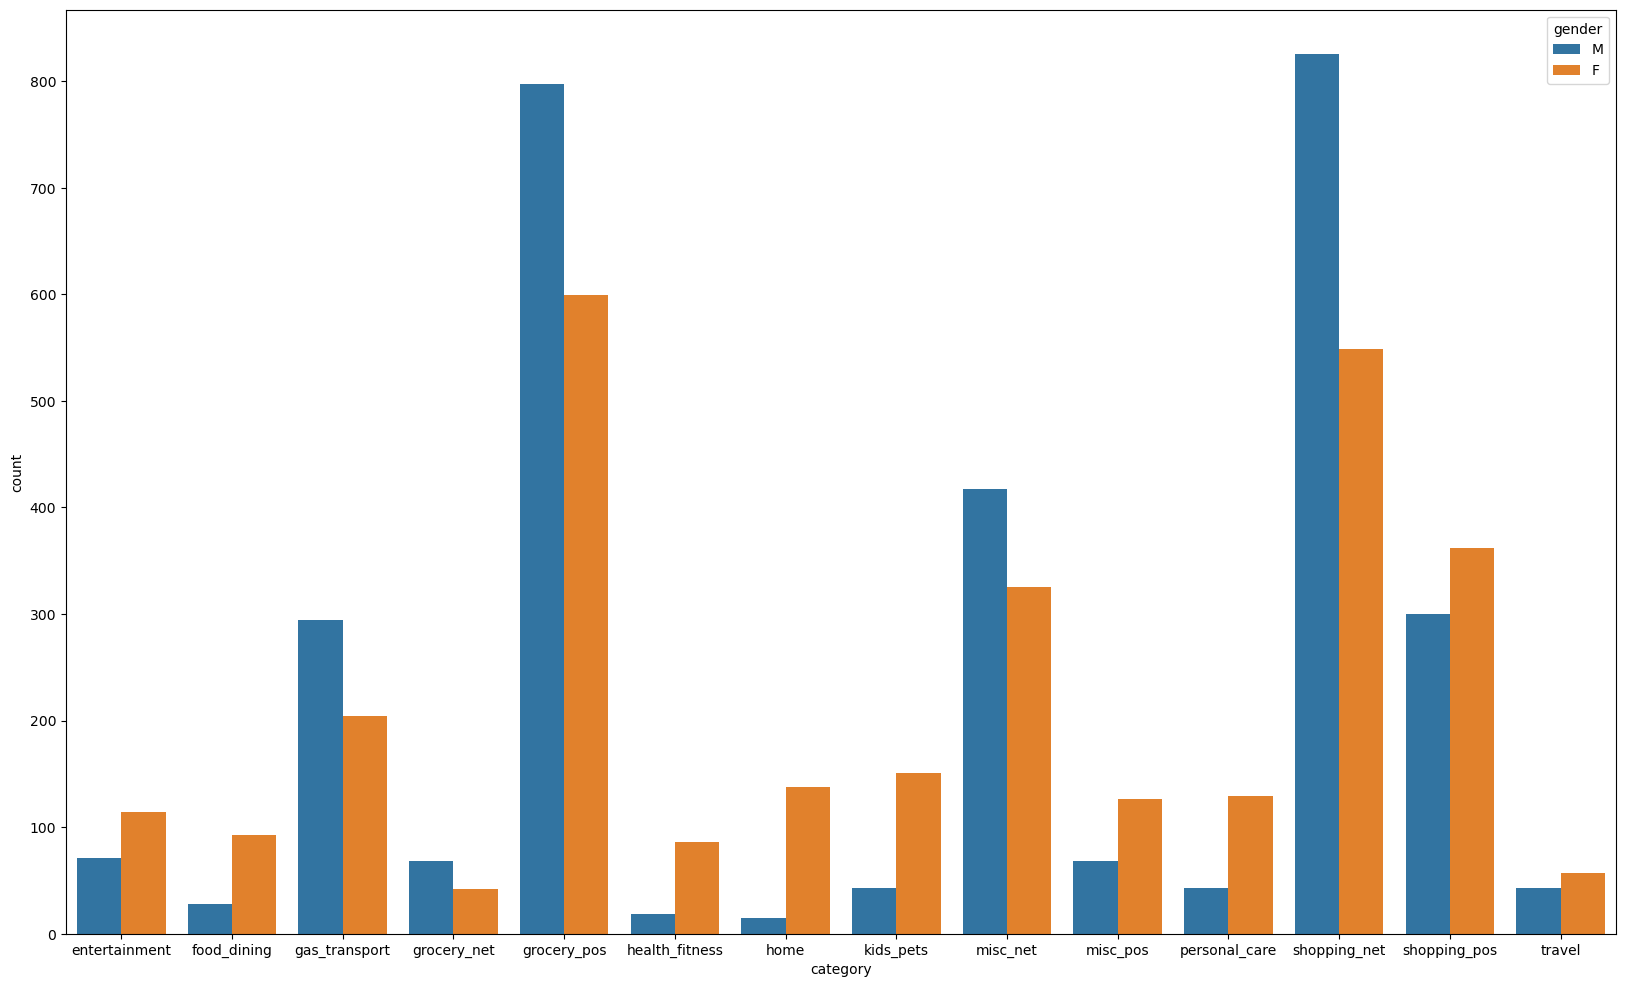

In [27]:
plt.figure(figsize=(20, 12))
sns.countplot(data=fraud_df, x="category", hue="gender", order=sorted_categories)
plt.show()

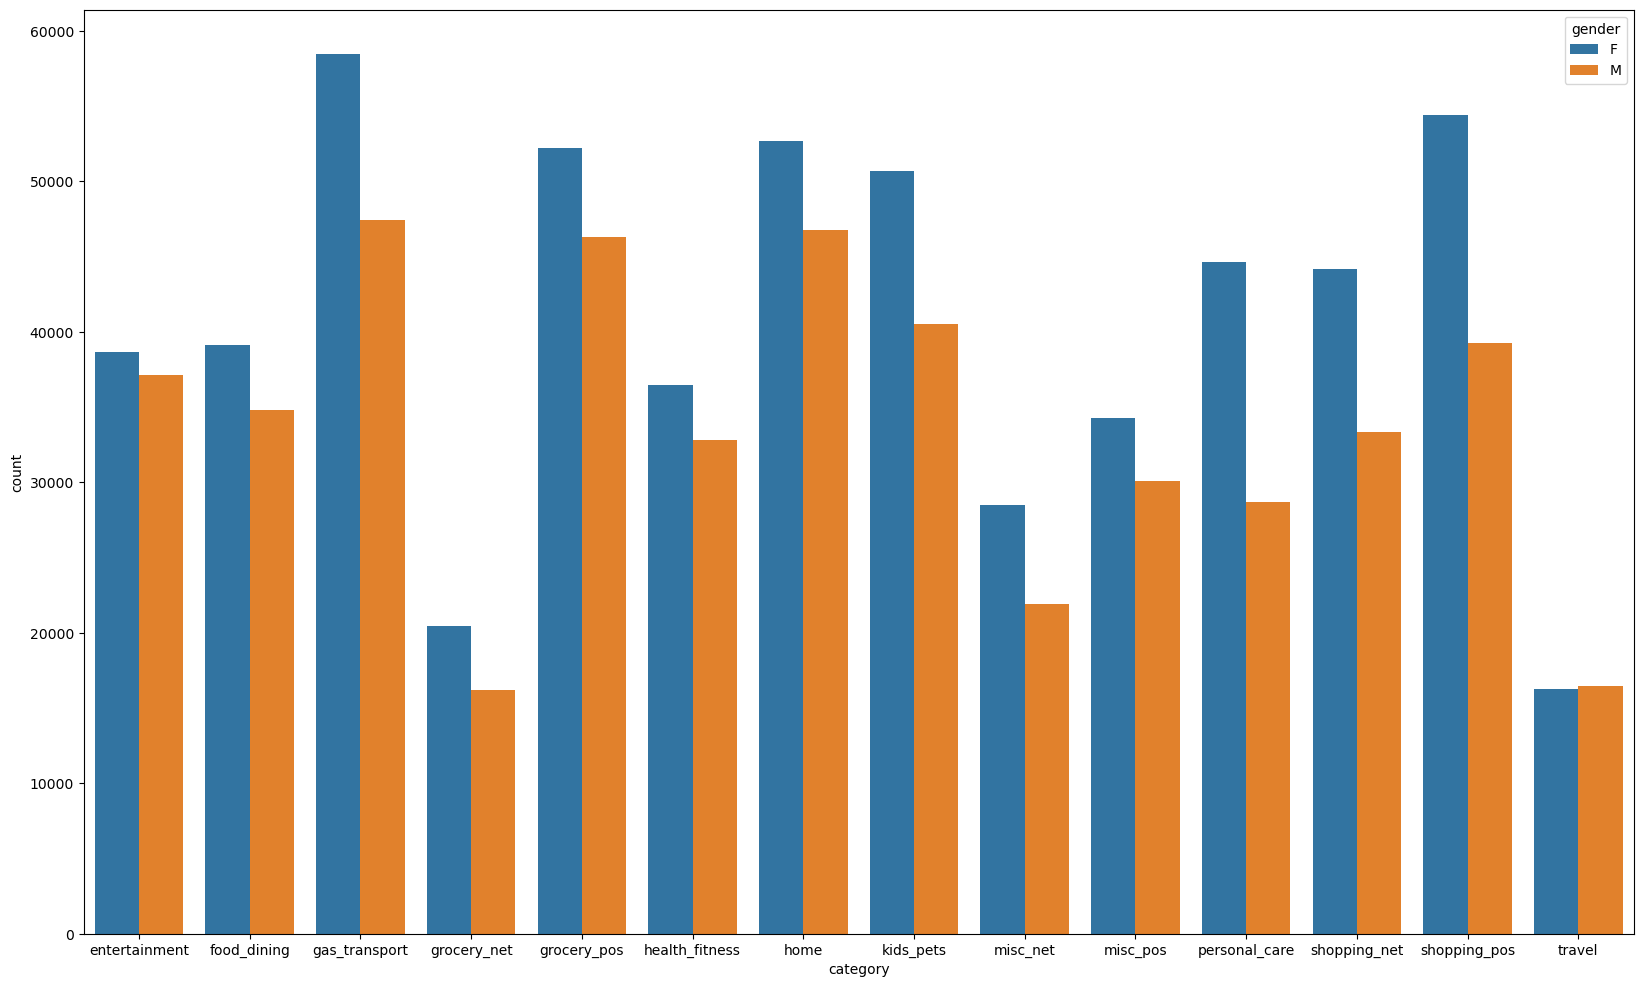

In [28]:
plt.figure(figsize=(20, 12))
sns.countplot(data=non_fraud, x="category", hue="gender", order=sorted_categories)
plt.show()

In [ ]:
plt.figure(figsize=(20, 12))
sns.countplot(data=fraud_df, x="", hue="gender", order=sorted_categories)
plt.show()

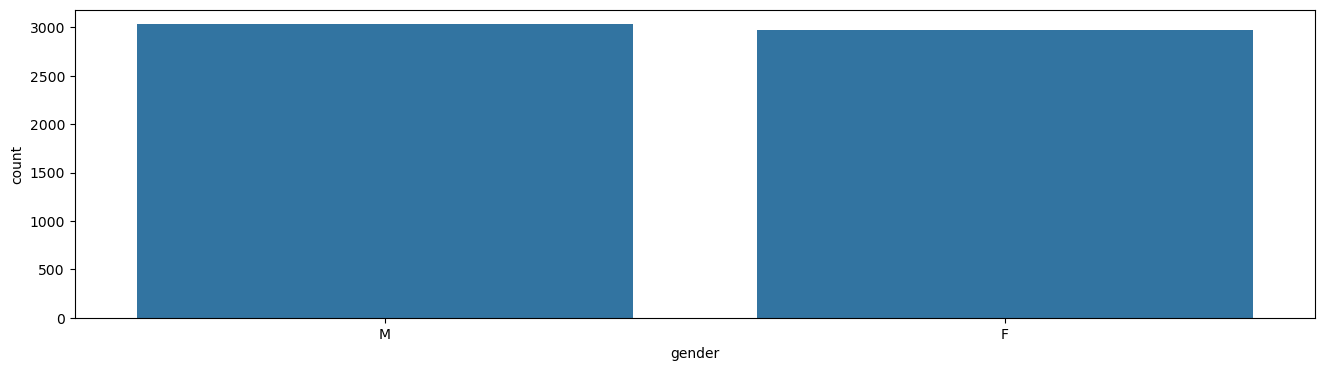

In [20]:
plt.figure(figsize=(16, 4))
sns.countplot(data=fraud_df, x="gender")
plt.show()

In [15]:
plt.figure(figsize=(16, 4))
sns.countplot(data=fraud_df, x="state", order=sorted_states)
plt.show()

NameError: name 'sorted_states' is not defined

<Figure size 1600x400 with 0 Axes>

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


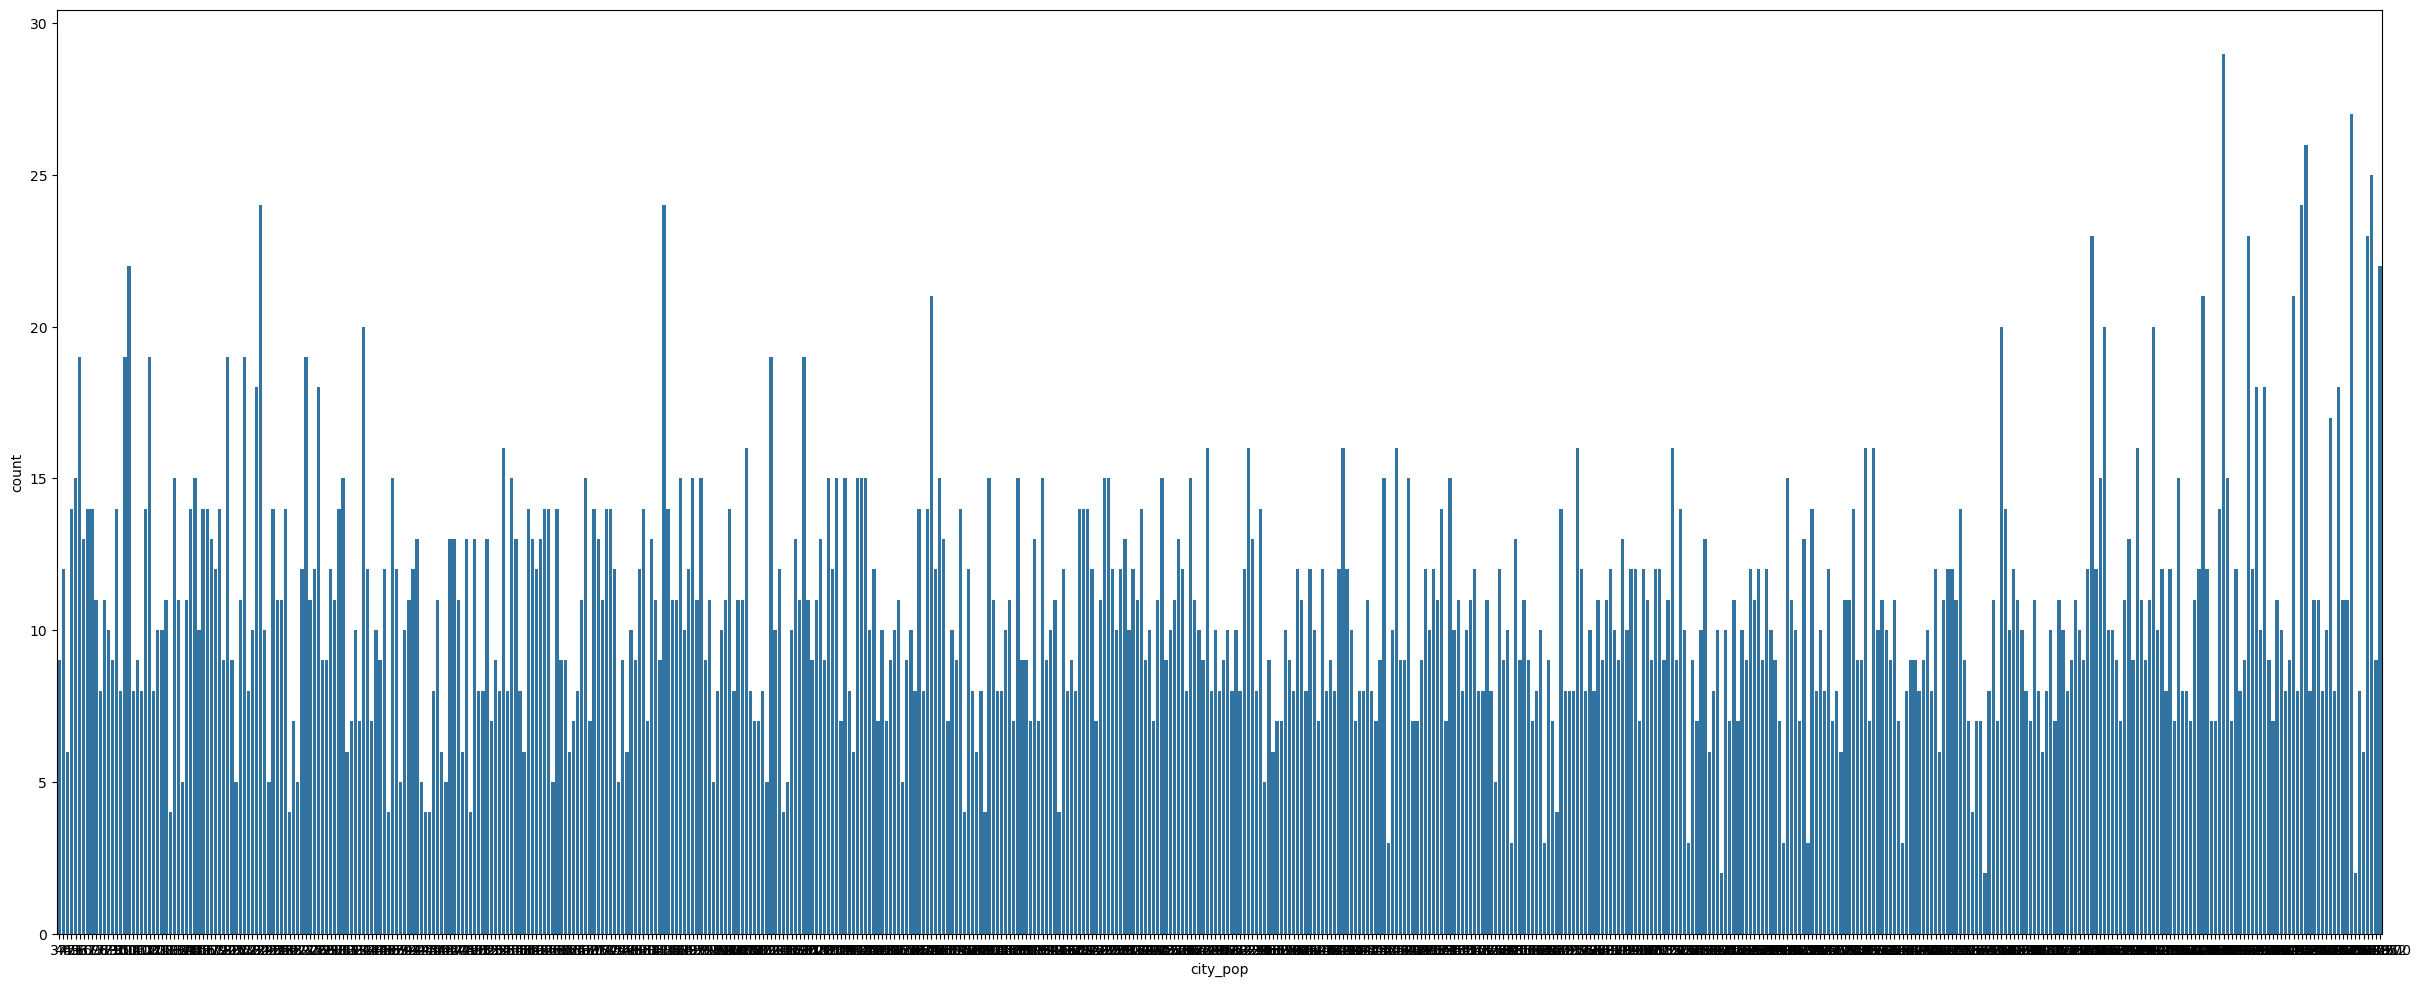

In [43]:
plt.figure(figsize=(30, 12))
sns.countplot(data=fraud_df, x="city_pop")
plt.show()

<Figure size 4000x2400 with 0 Axes>

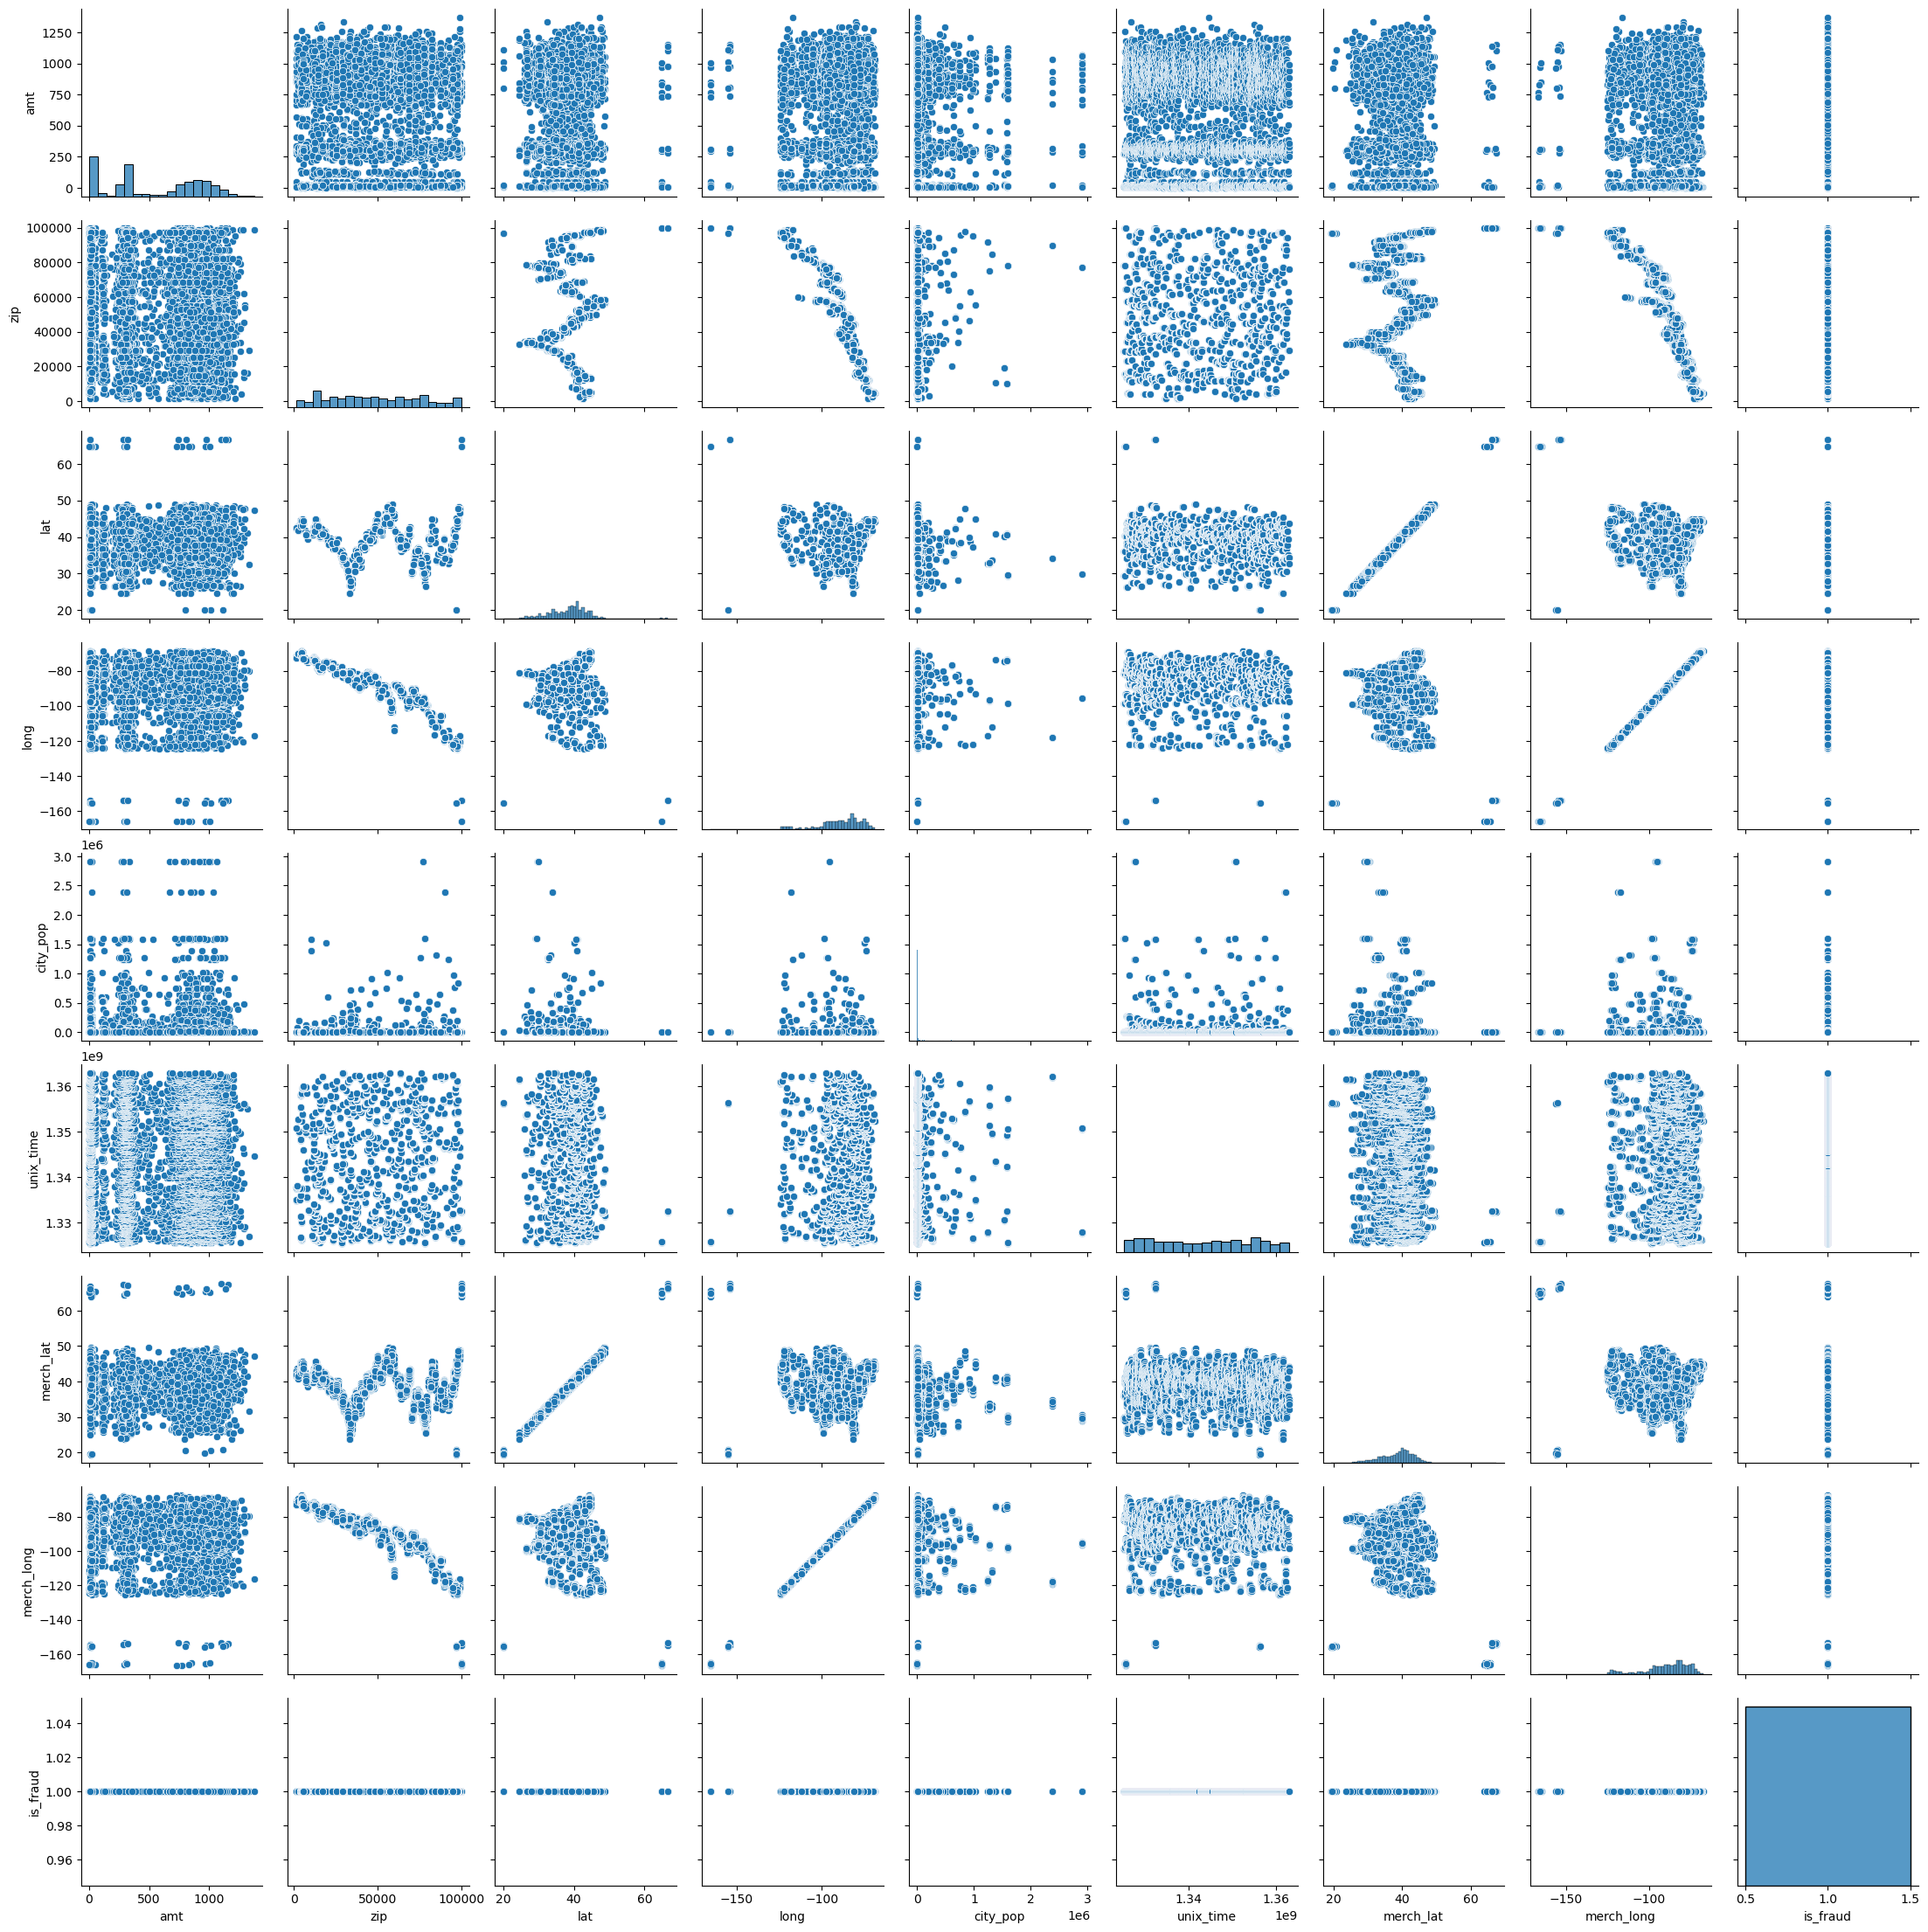

In [48]:
plt.figure(figsize=(40, 24))
sns.pairplot(data=fraud_df)

<Figure size 6000x6000 with 0 Axes>

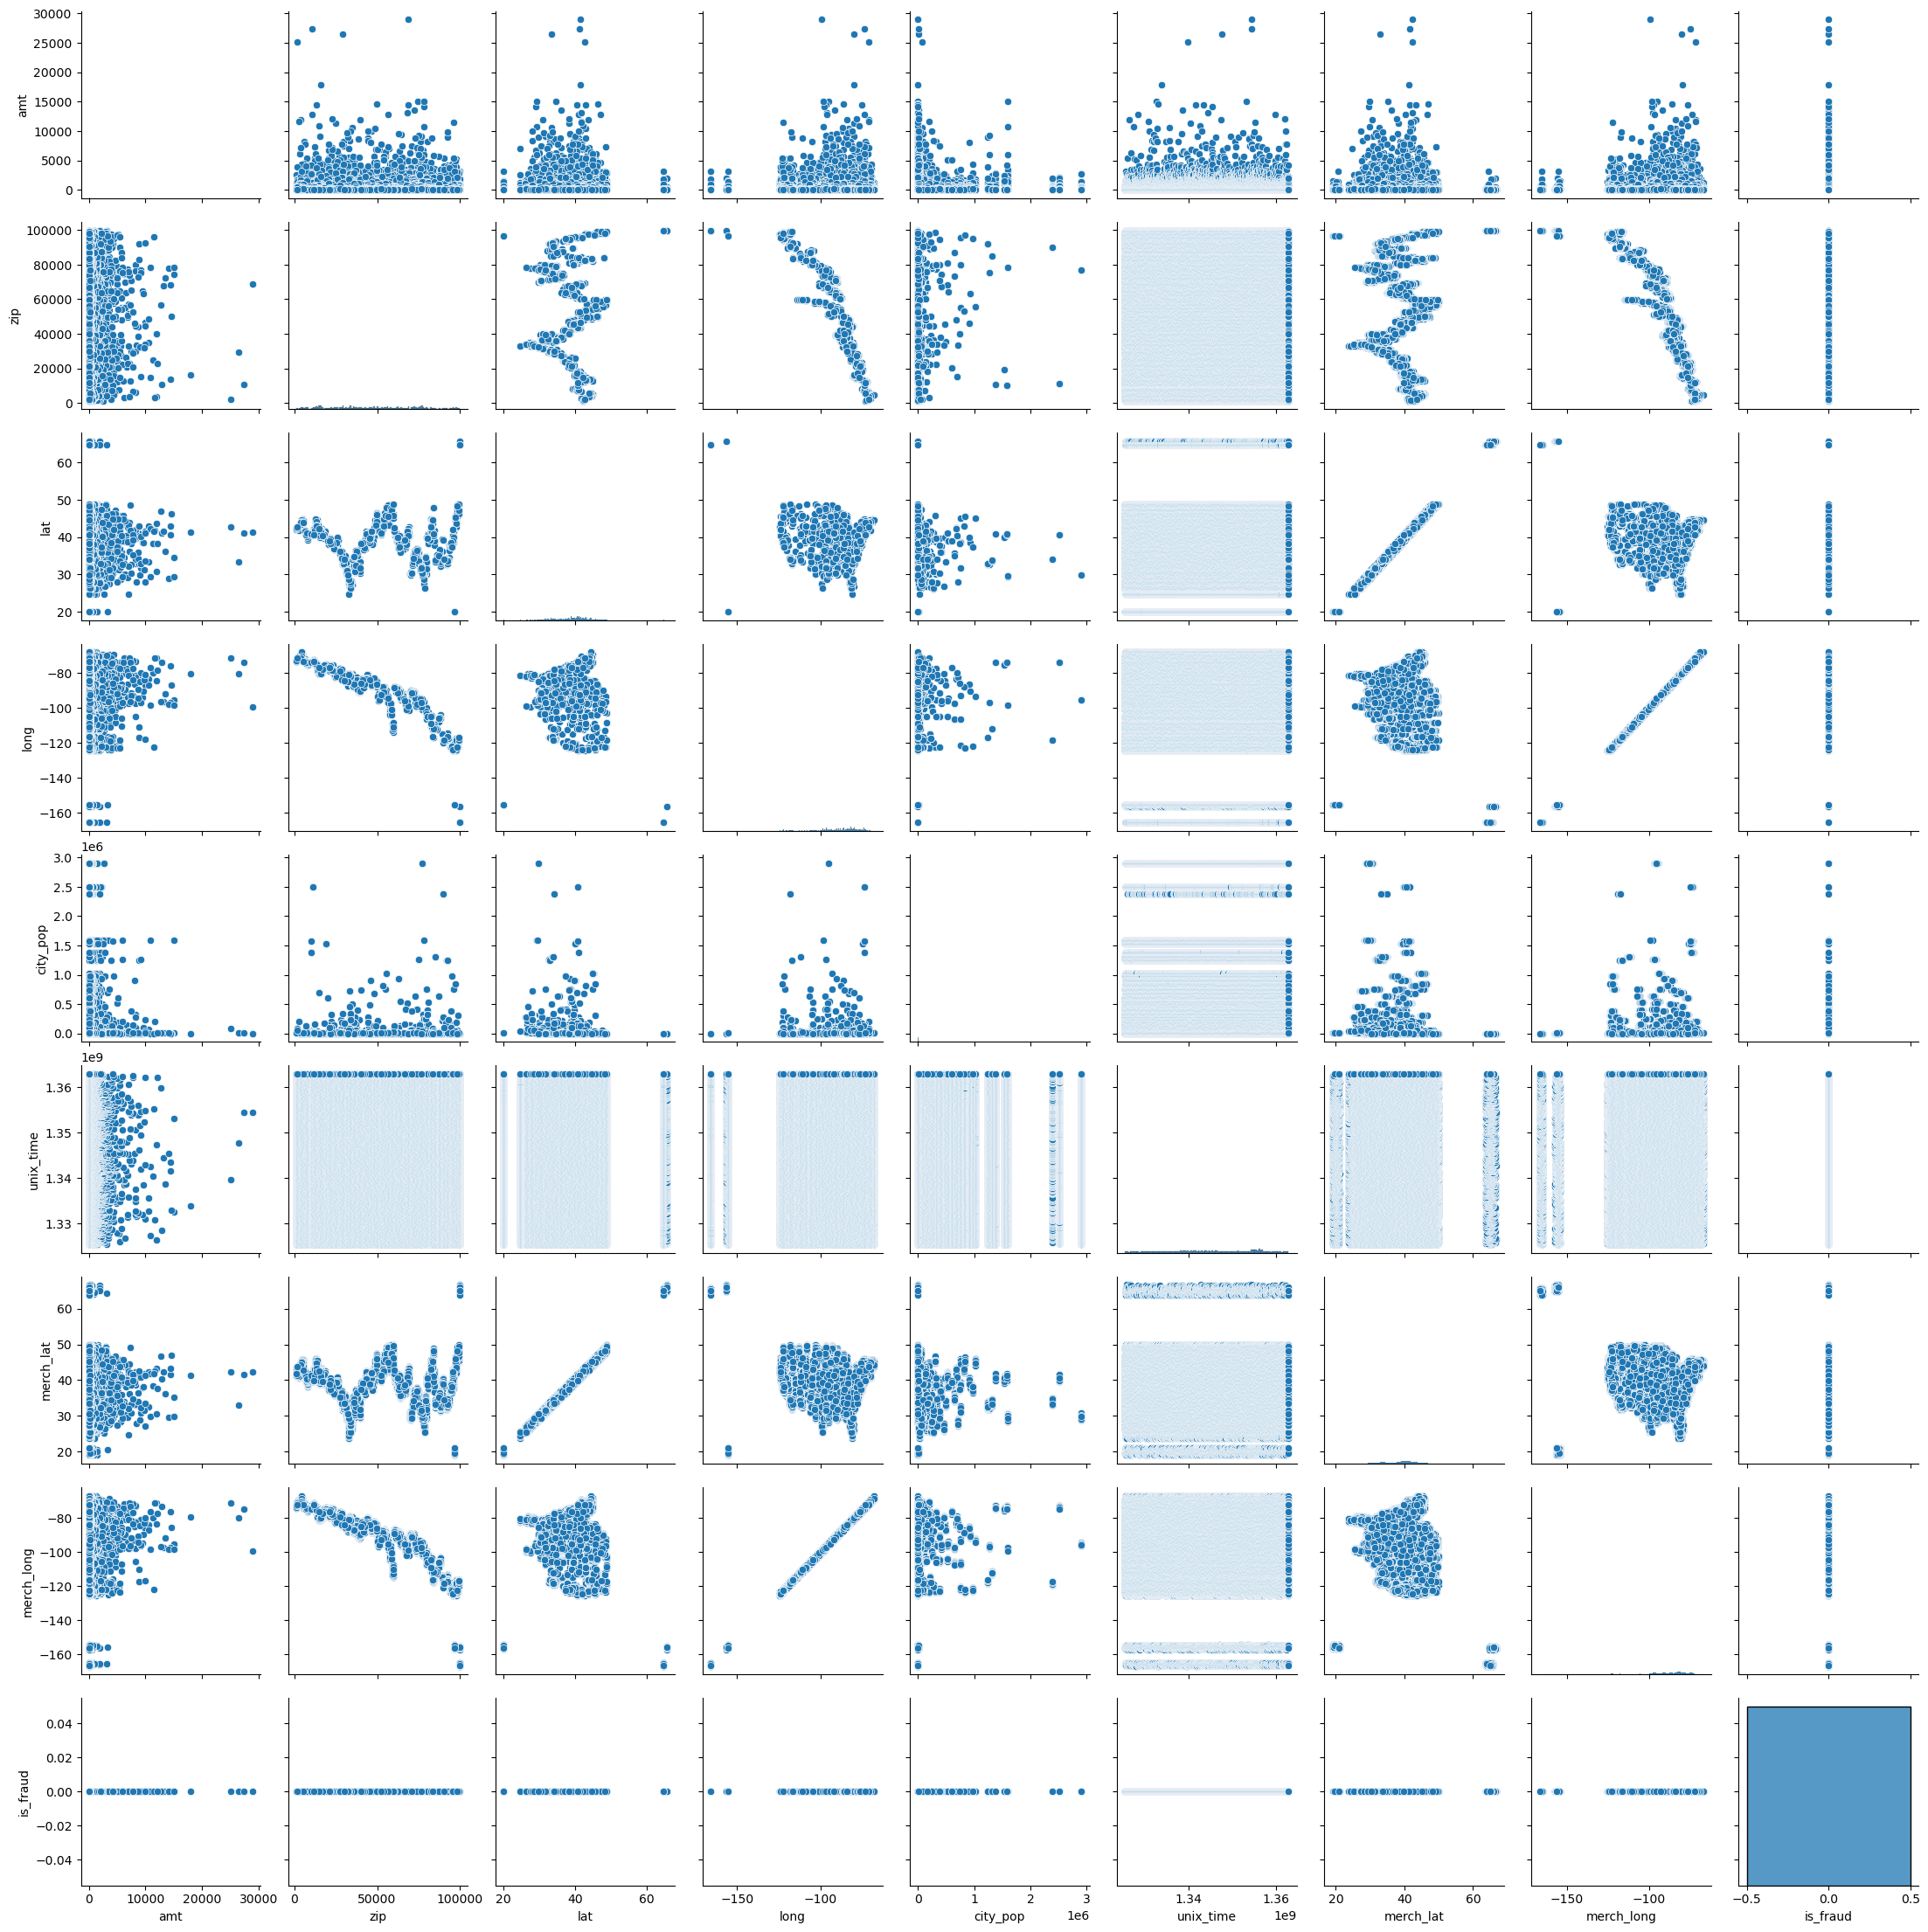

In [16]:
plt.figure(figsize=(60, 60))
sns.pairplot(data=non_fraud)
plt.show()

In [19]:
fraud_w_city = fraud_df["city"].unique()
print(fraud_w_city)
print(len(fraud_w_city))

['Collettsville' 'San Antonio' 'Manor' 'Wales' 'Browning' 'De Queen'
 'Ironton' 'Manquin' 'Downsville' 'Naples' 'Fulton' 'Nobleboro'
 'Harborcreek' 'Cochranton' 'Ravenna' 'Oak Hill' 'Mobile' 'San Jose'
 'Moriches' 'Westerville' 'Heiskell' 'Fayetteville' 'New Goshen'
 'Parsonsfield' 'Mc Veytown' 'Early' 'Thompson' 'Deadwood' 'Edisto Island'
 'Oxford' 'Hampton' 'Orangeburg' 'Rhame' 'Milford' 'Stephensport'
 'Sebring' 'Waukau' 'Parker Dam' 'Galatia' 'Washington Court House'
 'San Diego' 'Mountain Park' 'Houston' 'Crouse' 'Centerview' 'Washington'
 'Armagh' 'Vacaville' 'Warren' 'Bigelow' 'Smock' 'Shields' 'Madisonville'
 'Laredo' 'Nazareth' 'Mount Morris' 'New Memphis' 'Cranks' 'Saxon'
 'La Grande' 'West Columbia' 'Port Costa' 'Meadville' 'Albany' 'Greenport'
 'Allentown' 'Alva' 'Wilmington' 'West Frankfort' 'Hovland' 'Chattanooga'
 'Lowell' 'Albuquerque' 'Saint James City' 'Milner' 'Lamy' 'Big Indian'
 'Loami' 'Summerfield' 'Tiptonville' 'Pembroke' 'Afton' 'Wilmette'
 'Falls Church' 'Gain

### End